In [47]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib import colors

# 1. Make map

In [48]:
def make_map(size):
    direction = np.array([[1, 0], [0, 1]])
    direction2 = np.array([[1, 0], [0, 1], [-1, 0], [0, -1],
                           [1, 1], [-1, 1], [1, -1], [-1, -1]])
    m, n = size
    grid = np.zeros((m, n), dtype=int)

    present = np.array([0, 0])
    grid[present[0], present[1]] = 1
    while True:
        d = np.random.choice([0, 1])
        if present[0] + direction[d][0] >= m or present[1] + direction[d][1] >= n:
            break
        present[0] += direction[d][0]
        present[1] += direction[d][1]
        grid[present[0], present[1]] = 1
        for i in range(8):
            ni = present[0] + direction2[i][0]
            nj = present[1] + direction2[i][1]
            if ni < 0 or ni >= m or nj < 0 or nj >= n:
                continue
            grid[ni, nj] = 1

    return grid, tuple(present)

In [49]:
grid = np.array([
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
])

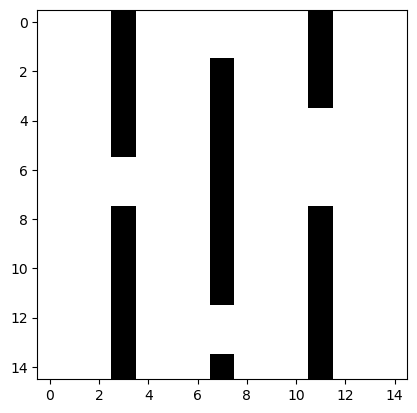

In [50]:
size = (15, 15)
#grid, goal = make_map(size)
plt.imshow(grid, cmap='gray')
plt.show()

# 2. A* Algorithm

Goal position: (14, 14)
Path found with length: 25
Number of Checking: 736


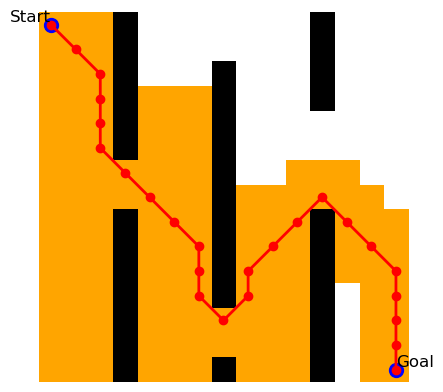

In [60]:
def heuristic(a, b):
    # Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    checking_points = set()
    count = 0

    m, n = grid.shape
    # Allowed moves: 8-directional
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1),
                  (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    open_set = []
    heapq.heappush(open_set, (heuristic(start, goal), 0, start, [start]))
    closed_set = set()

    while open_set:
        f, g, current, path = heapq.heappop(open_set)
        if current == goal:
            return path, count, checking_points
        if current in closed_set:
            continue
        closed_set.add(current)
        
        for dr, dc in directions:
            count = count + 1
            nr, nc = current[0] + dr, current[1] + dc
            neighbor = (nr, nc)
            # Check boundaries and whether the cell is traversable (value 1)
            if 0 <= nr < m and 0 <= nc < n and grid[nr, nc] == 1:
                checking_points.add(neighbor)
                if neighbor in closed_set:
                    continue
                new_cost = g + 1  # uniform cost for each move
                heapq.heappush(open_set, (new_cost + heuristic(neighbor, goal),
                                            new_cost, neighbor, path + [neighbor]))
                
    return None, count, checking_points # No path found

def plot_path(grid, path, start, goal, checking_points, llm_points = None):
    m, n = grid.shape

    checking_map = np.zeros_like(grid)

    cmap = colors.ListedColormap(['black','white', 'orange'])

    for point in checking_points:
        checking_map[point[0],point[1]] = 1

    plt.imshow(checking_map + grid, cmap = cmap)
    if path:
        path_rows = [p[0] for p in path]
        path_cols = [p[1] for p in path]
        plt.plot(path_cols, path_rows, color='red', linewidth=2, marker='o')
    
    
    plt.scatter([start[1], goal[1]], [start[0], goal[0]], color='blue', s=100)
    plt.text(start[1], start[0], 'Start', color='black', fontsize=12,
             verticalalignment='bottom', horizontalalignment='right')
    plt.text(goal[1], goal[0], 'Goal', color='black', fontsize=12,
             verticalalignment='bottom', horizontalalignment='left')
    if llm_points is not None:
        llm_points = np.array(llm_points)
        plt.scatter(llm_points[:,1], llm_points[:,0], color='yellow', s=100)
    plt.axis('off')
    plt.show()

# Example usage:
start = (0, 0)
goal = (14,14)
path, count, checking_points = astar(grid, start, goal)

print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of Checking:", count)
plot_path(grid, path, start, goal, checking_points)

# 3. LLM A* Algorithm

In [76]:
def llm_astar(grid, start, goal, llm_points):

    m, n = grid.shape
    # Allowed moves: 8-directional
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1),
                  (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    points = llm_points.copy()
    points.insert(0, start)
    points.append(goal)

    path = []
    checking_point = set()
    count = 0

    for i in range(len(points)-1):
        s = points[i]
        e = points[i+1]

        open_set = []
        heapq.heappush(open_set, (heuristic(s, e), 0, s, [s]))
        closed_set = set()

        while open_set:
            f, g, current, p = heapq.heappop(open_set)
            if current == e:
                path += p
                break
            if current in closed_set:
                continue
            closed_set.add(current)
            
            for dr, dc in directions:
                count = count + 1
                nr, nc = current[0] + dr, current[1] + dc
                neighbor = (nr, nc)
                # Check boundaries and whether the cell is traversable (value 1)
                if 0 <= nr < m and 0 <= nc < n and grid[nr, nc] == 1:
                    checking_point.add(neighbor)
                    if neighbor in closed_set:
                        continue
                    new_cost = g + 1  # uniform cost for each move
                    heapq.heappush(open_set, (new_cost + heuristic(neighbor, e),
                                                new_cost, neighbor, p + [neighbor]))
                    
    return path, count, checking_point

### LLM points 1 : (7,8)

Goal position: (14, 14)
Path found with length: 29
Number of Checking: 720


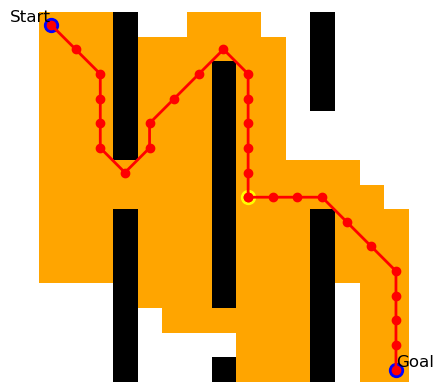

In [85]:
llm_points = [(7,8)]
start = (0, 0)
goal = (14,14)
path, count, checking_points = llm_astar(grid, start, goal, llm_points)

print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of Checking:", count)
plot_path(grid, path, start, goal, checking_points, llm_points)


### LLM points 3 : (9, 4), (12, 7), (7, 8)

Goal position: (14, 14)
Path found with length: 31
Number of Checking: 344


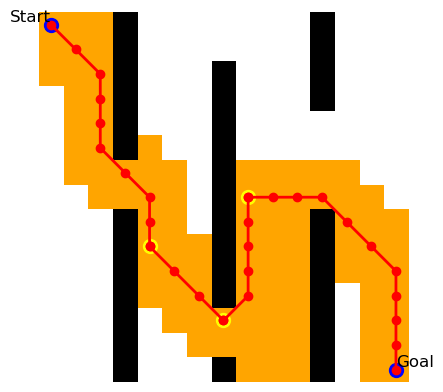

In [89]:
llm_points = [(9, 4), (12, 7), (7, 8)]
start = (0, 0)
goal = (14,14)
path, count, checking_points = llm_astar(grid, start, goal, llm_points)

print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of Checking:", count)
plot_path(grid, path, start, goal, checking_points, llm_points)


### LLM points 5 : (6,0), (9,4), (12,7), (7,9), (10,12)

Goal position: (14, 14)
Path found with length: 34
Number of Checking: 280


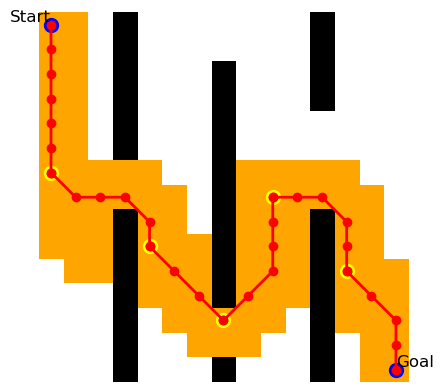

In [90]:
llm_points = [(6,0), (9,4), (12,7), (7,9), (10,12)]
start = (0, 0)
goal = (14,14)
path, count, checking_points = llm_astar(grid, start, goal, llm_points)

print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of Checking:", count)
plot_path(grid, path, start, goal, checking_points, llm_points)


### LLM points 7 : (4,0), (7,2), (10,4), (12,7), (8,8), (7,12), (12,12)

Goal position: (14, 14)
Path found with length: 37
Number of Checking: 232


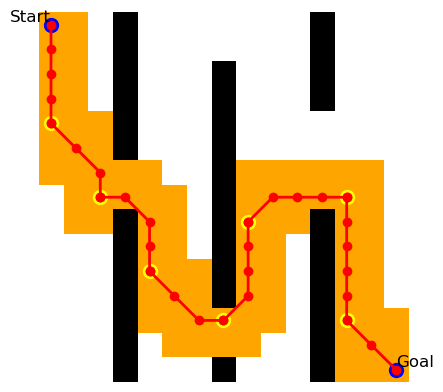

In [92]:
llm_points = [(4,0), (7,2), (10,4), (12,7), (8,8), (7,12), (12,12)]
start = (0, 0)
goal = (14,14)
path, count, checking_points = llm_astar(grid, start, goal, llm_points)

print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of Checking:", count)
plot_path(grid, path, start, goal, checking_points, llm_points)


### LLM points 11 : (3, 0), (6, 0), (7, 2), (9, 4), (12, 4), (12, 7), (10, 8), (7, 9), (7, 12), (10, 12), (13, 12)

Goal position: (14, 14)
Path found with length: 45
Number of Checking: 264


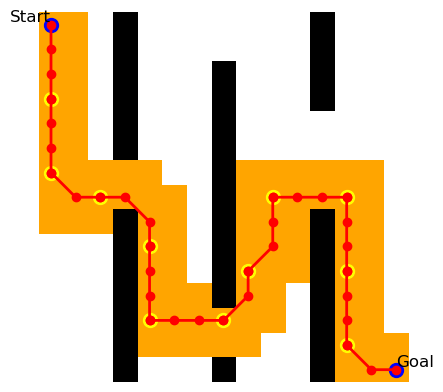

In [96]:
llm_points = [(3, 0), (6, 0), (7, 2), (9, 4), (12, 4), (12, 7), (10, 8), (7, 9), (7, 12), (10, 12), (13, 12)]
start = (0, 0)
goal = (14,14)
path, count, checking_points = llm_astar(grid, start, goal, llm_points)

print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of Checking:", count)
plot_path(grid, path, start, goal, checking_points, llm_points)
